# Uitleg Notebook: Audio Clustering & Kwaliteitscheck

In dit notebook worden de context van het project, de basiskennis die nodig is om met geluidsdata te werken, de manieren waarop je zelf data kunt verzamelen, en de reeds uitgeprobeerde methoden op dit gebied besproken.

## Context Project
**AppBakkers** werkt aan een project rondom het herkennen van **abnormale geluiden in een specifieke omgeving**, genaamd **Noesis**. Op dit moment zijn er twee oplossingen bedacht om geluid te herkennen met behulp van *deep learning*.

### In het kort:
**Supervised Learning**
Bij deze aanpak wordt een model getraind op data met **strong labels**: duidelijke labels die aangeven welk geluid er exact te horen is — bijvoorbeeld een blaffende hond.

**Unsupervised Learning**
Hier leert het model bekend geluid te herkennen door geluiden te reconstrueren. Als het model een geluid niet goed kan namaken, wordt het als **onbekend** beschouwd.

### Maar wat lost dit nu op?
Het gebruik van audio-analyse maakt het mogelijk om een gebied te monitoren **zonder dat je overal camera’s hoeft op te hangen** of constant beelden moet bekijken.

Een **microfoon**:
- heeft geen dode hoeken,
- is goedkoper om te installeren,
- en genereert compactere data dan videobeelden.

### Gekozen aanpak
We hebben ervoor gekozen om per situatie (zoals een kantoorpand, rangeerterrein of industrieterrein) een specifiek model te trainen.

De reden hiervoor:
- Geluid is complex en contextgevoelig.
- Dezelfde gebeurtenis klinkt anders in verschillende ruimtes. Bijvoorbeeld: iets dat valt klinkt anders in een galmende kamer dan buiten.

Maar... **deze aanpak introduceert een nieuw probleem**:

➡️ **Hoe verwerken we alle data om een model te trainen?**

### Doelen van het project
**Groeperen van geluiden**
Doel: **Inzicht krijgen in het geluidslandschap van een omgeving.**
We willen weten:
- hoeveel verschillende geluiden er zijn,
- hoe vaak specifieke geluiden voorkomen,
- en veelvoorkomende geluiden verminderen in de training (om overfitting te voorkomen).

Inzicht in datakwaliteit
Doel: **automatisch foutieve of onbruikbare data herkennen**,
zonder dat we alle geluidsopnames handmatig moeten terugluisteren.

## Basiskennis
Geluid is niets anders dan een trilling. Het ontstaat doordat een object (bijv. een stem, een gitaar, een deur) de lucht laat trillen. Onze oren nemen die trillingen waar als geluid.

👉 In data science proberen we die trillingen om te zetten naar cijfers. Maar wat betekent dat?

Denk eens na:
- Hoe ziet een geluid eruit?
- Kun je horen *wanneer* iets gebeurt? En *wat* er gebeurt?
- Kun je geluid beschrijven zonder het te horen?

### Van trilling naar getallen: het audiosignaal
Een microfoon luchtdruk meet over tijd → dit geeft ons een tijdreeks.

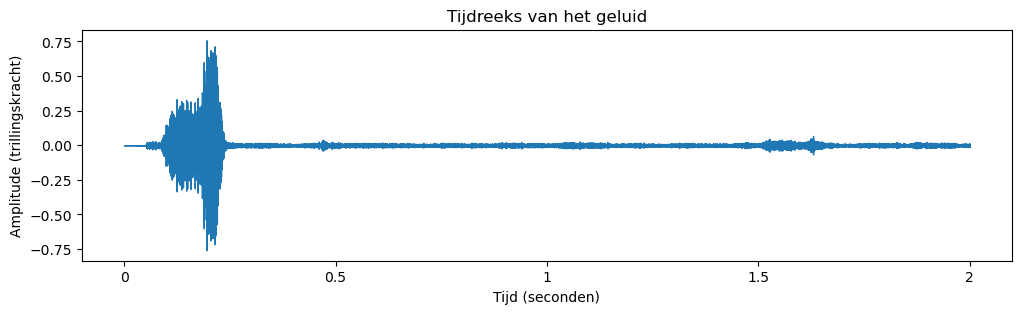

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import pandas as pd

# Load audio
y, sr = librosa.load("audio_fragments/05190.100417.watersniproepEempolder_fragment_0.wav", sr=None)

# Visualiseer het audiosignaal
plt.figure(figsize=(12, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Tijdreeks van het geluid")
plt.xlabel("Tijd (seconden)")
plt.ylabel("Amplitude (trillingskracht)")
plt.show()

Op basis van de trillingen zie je *wanneer* er iets gebeurt, maar niet *wat*. Om erachter te komen moet je dus naar het geluid luisteren.

In [3]:
# Display geluid
print("Audiobestand:")
display(Audio(y, rate=sr))

Audiobestand:


Wat hoor je nou precies? 



Maar hoe ziet de data er eigenlijk uit waar jullie mee gaan werken? Jullie zijn gewend om alles via een DataFrame te doen, maar voor geluid is het niet de beste optie.

In [4]:
# Display array
print("Geluidsarray:")
print(y)

Geluidsarray:
[ 0.          0.          0.         ... -0.00363159 -0.00552368
 -0.00506592]


In [5]:
df = pd.DataFrame(y, columns=['amplitude'])

print(df.head())
print(df.describe())

   amplitude
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
          amplitude
count  88200.000000
mean      -0.000008
std        0.037647
min       -0.758575
25%       -0.004211
50%       -0.000031
75%        0.004059
max        0.714996


Je ziet eigenlijk dat het voorbeeld geluid van twee seconde een DataFrame van 88200 datapunten bevat. Dit komt door de kwaliteit van de opname, namelijk de sample rate, vaak ook wel hertz genoemd. Hoe hoger de samplerate des te beter de kwaliteit, maar mensen kunnen eens niet boven de 20.000 hertz horen. 

Zoals eerder gezegd, we zien alleen maar wanneer een geluid is en niet wat het is. Zelfs met het terug luisteren hebben wij het probleem van wat het nou precies is. Daarom maken wij gebruik van andere features extraction methodes om meer informatie uit het geluid te halen.

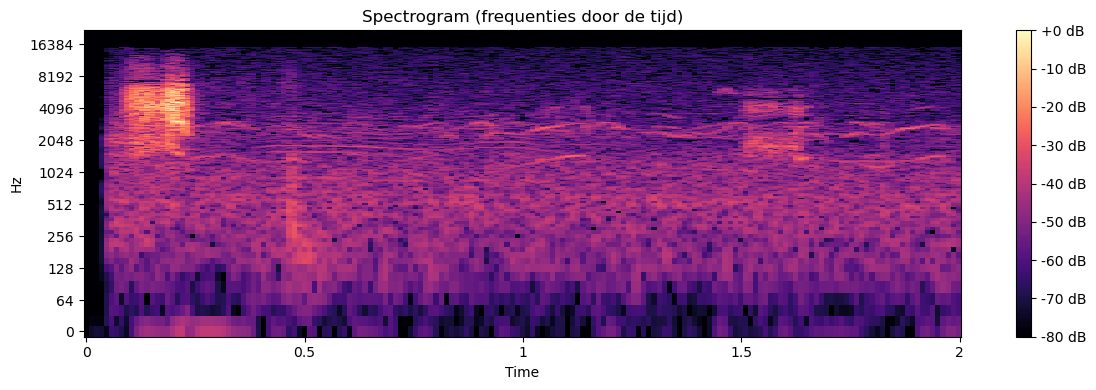

In [ ]:
import numpy as np

# STFT spectrogram
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (frequenties door de tijd)")
plt.tight_layout()
plt.show()

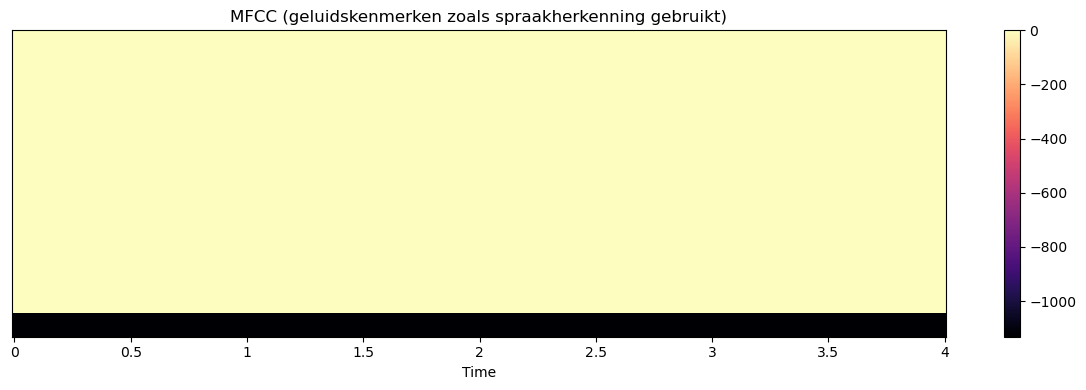

In [ ]:
# MFCC (meer biologisch geïnspireerd, zoals ons oor werkt)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.title("MFCC (geluidskenmerken zoals spraakherkenning gebruikt)")
plt.tight_layout()
plt.show()

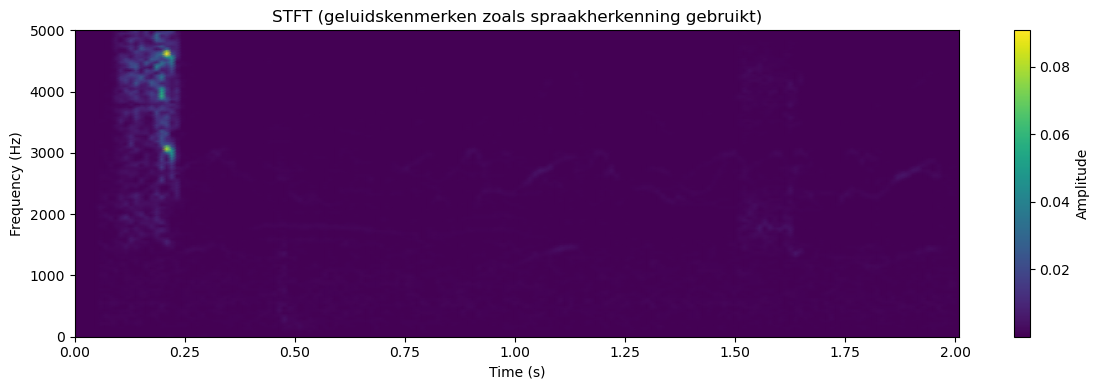

In [7]:
import scipy.signal as sg

# Perform Short-Time Fourier Transform (STFT)
frequencies, times, test = sg.stft(x=y, fs=sr, nperseg=1024, noverlap=512)

plt.figure(figsize=(12, 4))
plt.pcolormesh(times, frequencies, np.abs(test), shading='gouraud')
plt.colorbar(label='Amplitude')
plt.title("STFT (geluidskenmerken zoals spraakherkenning gebruikt)")
plt.ylim(0, 5000)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.tight_layout()
plt.show()

Hierboven zijn twee feature extraction methodes uitgebeeld die vanuit het frequentiedomein het geluid afbeelden. Hiernaast zijn er nog een tal van verschillende methodes die gebruikt kunnen worden om meer informatie uit geluid te halen. Dit zou je als input kunnen hebben voor je clustering in plaats van alleen de tijdsreeks. Daarnaast kan je bijvoorbeeld met SNR (Signal to Noise Ratio) kijken hoeveel ruis er in een bestand is om de kwaliteit in kaart te brengen.

Met deze basisinformatie kan je in je Data Preparation fase verschillende soorten technieken toepassen om meer informatie uit het audiobestand te halen, waardoor je misschien tot een goede clustering komt van geluiden, maar jullie moeten ook gaan kijken van hoe gaan we de input en output labelen. Misschien komen jullie tot conclusies dat je met geluid clustering impulsive geluiden niet  kunnen clusteren naar een specifiek geluid maar wel naar een concept zoals impulsgeluiden.

## Data
Het mooie aan geluid is dat het overal is, overal te vinden op het internet en je kan het zelf ook maken. Dus mijn voorstel is dat jullie het zelf gaan verzamelen. Klinkt als veel werkt, maar dat valt reuze mee. Ik geef jullie een script die op een laptop uitgevoerd kan worden om geluiden op te nemen. Hierdoor hebben jullie volledige controle en verantwoordelijkheid over de data. 

In [8]:
import sounddevice as sd
import scipy.io.wavfile as wav
import numpy as np
import os
from datetime import datetime

def record_audio_continuous(duration_minutes, chunk_duration_seconds, sample_rate, save_dir):
    # Bereken het totale aantal chunks
    total_duration_seconds = duration_minutes * 60
    num_chunks = int(total_duration_seconds / chunk_duration_seconds)
    
    # Zorg ervoor dat de map bestaat
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    print(f"Opname begint voor {duration_minutes} minuten...")

    for i in range(num_chunks):
        # Genereer een tijdstempel voor de bestandsnaam
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        file_name = f"opname_{timestamp}.wav"
        file_path = os.path.join(save_dir, file_name)  
        
        # Neem audio op voor de duur van een chunk
        audio_data = sd.rec(int(chunk_duration_seconds * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
        sd.wait()  # Wacht tot de opname klaar is
        print(f"Chunk {i+1}/{num_chunks} opgenomen en opslaan als {file_path}")
        
        # Sla de audio op in float64
        audio_data_int16 = np.int16(audio_data * 32767)  # Converteer naar 16-bit integer
        
        # Sla de audio op in de opgegeven map met float64 precisie
        wav.write(file_path, sample_rate, audio_data_int16)

    print("Alle opnames voltooid en opgeslagen.")

# Parameters voor de opname
duration_minutes = 1  # Totale opnametijd in minuten
chunk_duration_seconds  = 2  # Opnametijd in seconden
sample_rate = 44100  # Sample rate in Hz (standaard voor CD-kwaliteit)
date = datetime.now().strftime("%Y%m%d_%H%M%S")
save_dir = f"dataset/{date}"  # Map waarin de opnames worden opgeslagen

# Voer de opname uit en sla op in de map
record_audio_continuous(duration_minutes, chunk_duration_seconds, sample_rate, save_dir)

Opname begint voor 1 minuten...
Chunk 1/30 opgenomen en opslaan als dataset/20250513_101133\opname_20250513_101133.wav
Chunk 2/30 opgenomen en opslaan als dataset/20250513_101133\opname_20250513_101136.wav
Chunk 3/30 opgenomen en opslaan als dataset/20250513_101133\opname_20250513_101138.wav
Chunk 4/30 opgenomen en opslaan als dataset/20250513_101133\opname_20250513_101141.wav


KeyboardInterrupt: 

TIP: maak dus een folder aan voor 1 specifiek soort geluid, bijvoorbeeld spuitbus en daarna 5 minuten schudden ermee en daarna een nieuwe folder voor het volgende geluid. Zo maak je het label proces heel snel. Daarnaast hoeft de data ook niet perfect te zijn, want als het goed is moet deze eruit geclusterd worden. De labels zijn eigenlijk echt bedoelt als controle van als het klopt. 

Daarnaast kan je ook nog iets moois doen met data, namelijk data augmentatie, het aanpassen van data met een script. Dit wordt vooral gebruikt om een Machine Learning model robuuster te maken, maar je kan het ook doen om extra data te generen dat realistisch is.  

In [7]:
def add_noise(audio, noise_level=0.005):
    """
    Add Gaussian noise to an audio signal.

    Parameters:
    - audio (np.ndarray): 1D array of audio samples (e.g. 44.1k samples for 1 sec at 44.1kHz).
    - noise_level (float): Standard deviation of the noise. Higher = more noise.

    Returns:
    - np.ndarray: Augmented audio with noise added.
    """
    noise = np.random.normal(0, noise_level, audio.shape)
    augmented_audio = audio + noise
    return np.clip(augmented_audio, -1.0, 1.0)  # clip to valid range

# Voeg ruis toe
augmented_y = add_noise(y, noise_level=0.01)

# Display geluid
print("Orgineel:")
display(Audio(y, rate=sr))

# Display geluid
print("Augmented:")
display(Audio(augmented_y, rate=sr))

Orgineel:


Augmented:


Daarnaast is het misschien wel handig voor jullie om het script te krijgen om geluid makkelijk in te laden op de manier hoe ik het altijd doe. Ik houd de structuur aan van:
- Root
    - Data
        - Dataset 1
            - Spuitbus
            - Auto
            - Spraak
    - Notebook 

In [24]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder

def load_dataframe(base_path, desired_labels):
    """
    Creates a DataFrame of file segments and their associated labels from a directory structure.
    
    Parameters:
    - base_path: str, the path to the main directory containing subdirectories with files.
    - desired_labels: list of str, the labels to retain in the final DataFrame.
    
    Returns:
    - df: pd.DataFrame, DataFrame containing file paths and numerical labels.
    - label_mapping: dict, mapping of labels to their numerical values.
    """
    # Lists to store the data
    segment_paths = []
    labels = []

    # Loop through the directory structure
    for label in os.listdir(base_path):
        label_path = os.path.join(base_path, label)
        if os.path.isdir(label_path):
            for segment in os.listdir(label_path):
                segment_path = os.path.join(label_path, segment)
                segment_paths.append(segment_path)
                labels.append(label)

    # Create a DataFrame
    df = pd.DataFrame({
        'file_path': segment_paths,
        'label': labels
    })

    # Filter the DataFrame to include only the desired labels
    df = df[df['label'].isin(desired_labels)]

    # Reset the index of the DataFrame
    df.reset_index(drop=True, inplace=True)

    # Map labels to numerical values using LabelEncoder
    label_encoder = LabelEncoder()
    df['label_numerical'] = label_encoder.fit_transform(df['label'])

    # Create a label mapping dictionary
    label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

    return df, label_mapping

De output is uiteindelijk een dataframe met de paden van de files en labels die je vervolgens met een simpele loop kan inladen naar audiobestanden die gebruikt kunnen worden voor experimenten. Daarnaast kan je de feature extraction en data augmentatie verwerken in het voorbereiden van de data.

## Wat is er nu gemaakt?
Ik heb een proof of concept gemaakt op beide onderdelen om te kijken als het mogelijk is en ik kwam tot een resultaat wat redelijk bruikbaar was. Ik heb op basis van verschillende features als input gebruikt en deze gecombineerd om vervolgens dit door een clustering te bepalen. 

Daarnaast heb ik voor mijn afstuderen features onderzocht die wat over het geluid vertellen en vervolgens een punten systeem aan gekoppelt op hoe bruikbaar de data is.